# Random Forest Model on Activities (Include Hyperparameter tuning by RandomSearchCV)
GONG ZERUI 04/14

### 1. Load libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
import time
import warnings

### 2. Split train-test datasets

In [3]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])


y_train = df_train.Activity
X_train = df_train.drop(['subject', 'Activity'], axis=1)

y_test = df_test.Activity
X_test = df_test.drop(['subject', 'Activity'], axis=1)


print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', X_test.shape)
print('y_test : ', y_test.shape)


X_train :  (7352, 561)
y_train :  (7352,)
X_test :  (2947, 561)
y_test :  (2947,)


### 3. Build Random Forest Model with Hyperparameter Tuning (RandomizedSearchCV)

In [4]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=2, stop=50, num=2)]


In [5]:
# Create the random grid
param = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
}

rf_Model = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_rs = RandomizedSearchCV(
    estimator=rf_Model, param_distributions=param, random_state = 42
)


In [6]:
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 50],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42)

### 4. Print out best random search parameters


In [7]:
print("Best estimator : ", rf_rs.best_estimator_)
print("Best set of parameters : ", rf_rs.best_params_)

Best estimator :  RandomForestClassifier(max_depth=50, n_estimators=178)
Best set of parameters :  {'n_estimators': 178, 'max_depth': 50}


### 5. Print out Accuracy and FEATURE IMPORTANCE

In [8]:
from sklearn.metrics import accuracy_score

y_pred = rf_rs.predict(X_test)
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest with hyperparameter tuning : ", rf_accuracy)

Accuracy using Random forest with hyperparameter tuning :  0.9260264675941635


In [29]:
# print importance
rf_Model = RandomForestClassifier(max_depth=50, n_estimators=157)
rf_Model.fit(X_train, y_train)
d = {'Parameter':X_train.columns,'FeatureImportance':rf_Model.feature_importances_}
df_importance = pd.DataFrame(d)
df_importance.head(30)

,Parameter,FeatureImportance
0,tBodyAcc-mean()-X,0.000166
1,tBodyAcc-mean()-Y,0.000253
2,tBodyAcc-mean()-Z,0.000160
3,tBodyAcc-std()-X,0.004047
4,tBodyAcc-std()-Y,0.000337
5,tBodyAcc-std()-Z,0.000350
6,tBodyAcc-mad()-X,0.005593
7,tBodyAcc-mad()-Y,0.000575
8,tBodyAcc-mad()-Z,0.000523
9,tBodyAcc-max()-X,0.007651


In [111]:
df_importance_sorted = df_importance.sort_values('FeatureImportance', ascending= False)
df_importance_sorted.head(30)

df_top30 = df_importance_sorted.head(30).reset_index(drop =True)
df_top200 = df_importance_sorted.head(200).reset_index(drop =True)


### 6. Print out confusion matrix

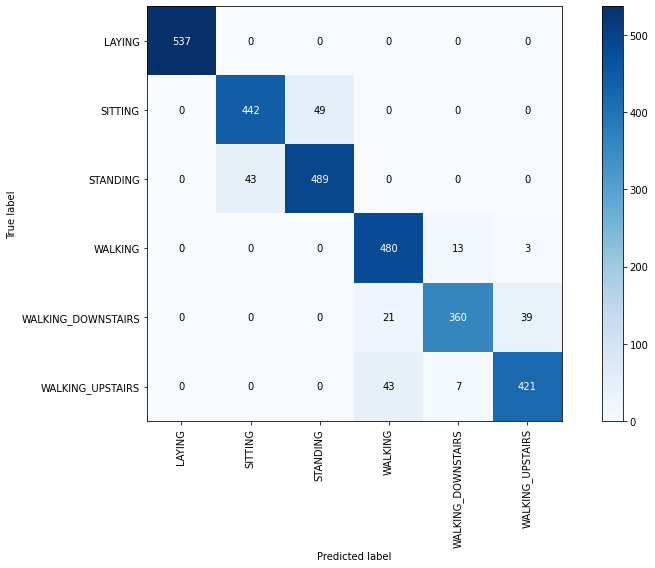

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()





### 7. Delete important features and re-test models

In [107]:
logisticRegression_top30Feature = [
    "angle(X,gravityMean)",
    "tGravityAcc-energy()-Y",
    "tGravityAcc-max()-Y",
    "tGravityAcc-mean()-Y",
    "tGravityAcc-energy()-Z",
    "tGravityAcc-min()-Y",
    "tBodyAcc-correlation()-X,Y",
    "fBodyGyro-meanFreq()-Y",
    "fBodyGyro-kurtosis()-X",
    "tGravityAcc-entropy()-Y",
    "tBodyGyro-correlation()-Y,Z",
    "tBodyAccJerk-correlation()-X,Z",
    "tBodyAcc-correlation()-X,Z",
    "fBodyGyro-kurtosis()-Y",
    "tGravityAcc-iqr()-X",
    "fBodyGyro-skewness()-X",
    "tGravityAcc-mad()-X",
    "tGravityAcc-std()-X",
    "fBodyAccJerk-maxInds-Y",
    "fBodyGyro-meanFreq()-Z",
    "tBodyGyroJerk-arCoeff()-Y,1",
    "fBodyAcc-meanFreq()-X",
    "tBodyGyroJerk-arCoeff()-X,1",
    "fBodyGyro-meanFreq()-X",
    "tGravityAcc-max()-Z",
    "tBodyGyroJerk-arCoeff()-Y,2",
    "tBodyGyro-arCoeff()-X,1",
    "tBodyAccJerk-correlation()-X,Y",
    "tBodyGyroJerk-arCoeff()-Y,3",
    "fBodyAccMag-max()",
]

randomForest_top30Feature = []
for param in df_top30['Parameter']:
    randomForest_top30Feature.append(param)

randomForest_top200Feature = []
for param in df_top200['Parameter']:
    randomForest_top200Feature.append(param)

top_feature_mutual = []
for param in logisticRegression_top30Feature:
    if param in randomForest_top30Feature:
        top_feature_mutual.append(param)

top_feature_mutual

['angle(X,gravityMean)',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-max()-Y',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-min()-Y',
 'tGravityAcc-max()-Z']

* Load data and exclude top features

In [120]:
df_train_retest = df_train.copy()
df_test_retest = df_test.copy()

for param in df_importance_sorted['Parameter']:
    if 'Acc' in param: 
        df_train_retest.pop(param)
        df_test_retest.pop(param)


y_train = df_train_retest.Activity
X_train = df_train_retest.drop(['subject', 'Activity'], axis=1)

y_test = df_test_retest.Activity
X_test = df_test_retest.drop(['subject', 'Activity'], axis=1)

print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', X_test.shape)
print('y_test : ', y_test.shape)

X_train :  (7352, 216)
y_train :  (7352,)
X_test :  (2947, 216)
y_test :  (2947,)


* Build RandomForest model

In [121]:
rf_Model_retest = RandomForestClassifier(max_depth=50, n_estimators=157)
rf_Model_retest.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=157)

* Print Accuracy

In [122]:
y_pred = rf_Model_retest.predict(X_test)
rf_accuracy_retest = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy after deleting important features : ", rf_accuracy_retest)

Accuracy after deleting important features :  0.9107567017305734
